Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 47)             │           329 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 47)             │         2,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 47)             │         2,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 47)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,889 (19.10 KB)

 Trainable params: 4,889 (19.10 KB)

 Non-trainable params: 0 (0.00 B)

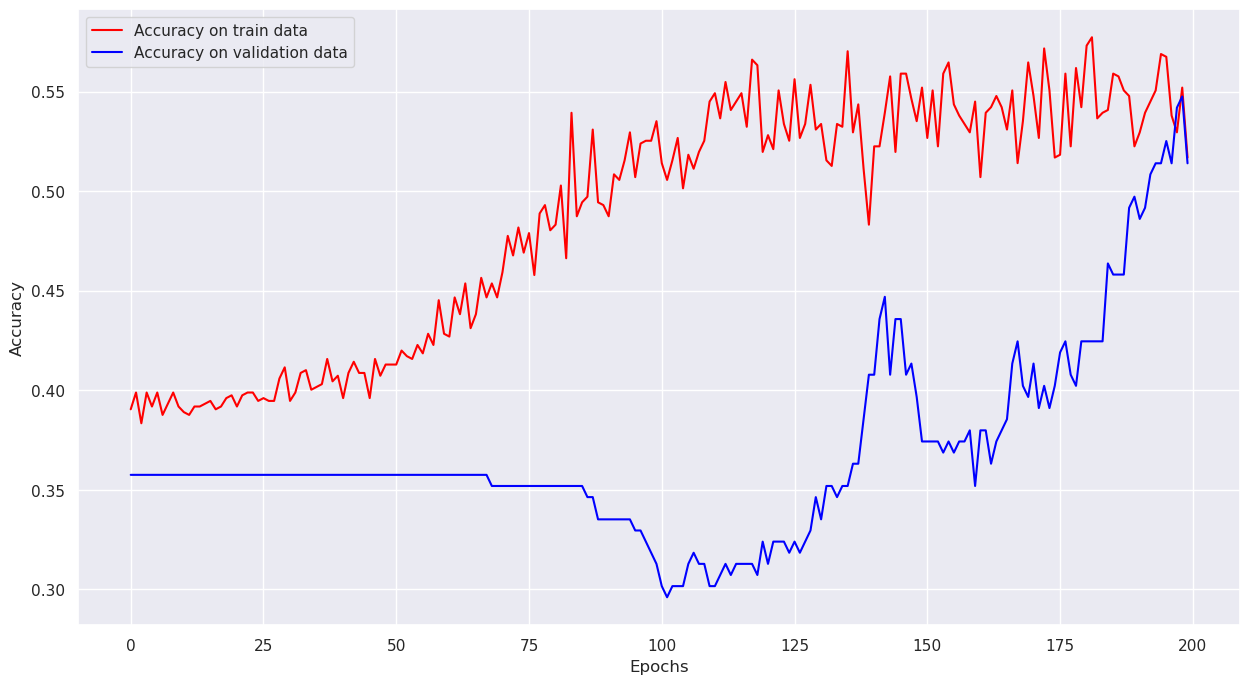

In [3]:

#### ---- Keras on titanic dataset ---- ####

import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from numpy.random import seed
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential

warnings.filterwarnings("ignore")
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={"figure.figsize":(15,8)})

df_titanic = pd.read_csv("./titanic.csv")

# features
X = df_titanic.drop(["Survived", "Name", "Sex", "Ticket", "Cabin", "Embarked" ], axis=1)
X["Pclass"] = X["Pclass"].fillna(5)
X["Age"] = X["Age"].fillna(X["Age"].mean())
X["Fare"] = X["Fare"].fillna(X["Fare"].mean())

# target
y = df_titanic["Survived"]

# set seed to get same results
seed(42)
tf.random.set_seed(42)

# determine the number of input features
n_cols = X.shape[1]

nb_neurons=48

model = Sequential()
model.add(Dense(nb_neurons, activation = "linear", input_shape = (n_cols,)))
model.add(Dense(nb_neurons, activation = "linear")) 
model.add(Dense(nb_neurons, activation = "linear")) 

# avoid overfitting, inject random entry data
model.add(Dropout(0.1))
    
# output layer
model.add(Dense(1, activation = "sigmoid"))  

model.summary()

model.compile(loss = "binary_crossentropy", optimizer = "Adadelta", metrics = ["accuracy"])

history = model.fit(X, y, epochs = 200, batch_size = 32, validation_split = 0.2, verbose = 0)

plt.plot(history.history["accuracy"], "red", label = "Accuracy on train data")
plt.plot(history.history["val_accuracy"], "blue", label = "Accuracy on validation data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
